# Dataset

the data set is called battlers (AKA non copyrighted pokeman) from Pokemon Infinite Fusion.

# Goal 
the end goal is to create believables pokemon sprite based of the huge data set of 400*400 ish combinations

# Part 1: Load Data | EDA | clean | save to file.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing.image import load_img, img_to_array

#set tensorflow to use m1 gpu



In [2]:
# !unzip MyDrive/Datasets/Pokemon/infinitefusion_preloaded_5.2.1_full.zip -d /dataset


In [3]:
POKEPATH = "/Users/suchattangjarukij/Downloads/infinitefusion_preloaded_5.2.1_full/Graphics/CustomBattlers/indexed/*/*.png"

In [4]:
from glob import glob
FILEPATHS = glob(POKEPATH)

In [5]:
METADATA = []
METADATA_errors = []
for path in FILEPATHS:
  filename = path.split("/")[-1]
  prim = filename.split(".")[0]
  sec = filename.split(".")[1]
  is_png = (filename.split(".")[-1] == "png")
  if sec =="png":
    sec = "0"
  if prim.isnumeric() and sec.isnumeric() and is_png:
    try:
    # Load the image
      img = load_img(path, color_mode='rgba',target_size=(228,228,4))

      METADATA.append({
          "primary_dex": prim,
          "secondary_dex":sec,
          "path":path
      })
    except Exception as e:
        print("Unable to open image file:", str(e))
        METADATA_errors.append({"path":path,"error":"unable to load image"})

    
  else:
    METADATA_errors.append({"path":path,"error":"format"})

METADATA_DF = pd.DataFrame(METADATA).set_index(["primary_dex","secondary_dex"]).sort_index()
METADATA_DF.head()

Unable to open image file: cannot identify image file <_io.BytesIO object at 0x157bf9d10>


path
primary_dex secondary_dex                                                   
1           1              /Users/suchattangjarukij/Downloads/infinitefus...
            10             /Users/suchattangjarukij/Downloads/infinitefus...
            100            /Users/suchattangjarukij/Downloads/infinitefus...
            101            /Users/suchattangjarukij/Downloads/infinitefus...
            102            /Users/suchattangjarukij/Downloads/infinitefus...

In [6]:
METADATA_errors_DF = pd.DataFrame(METADATA_errors)
METADATA_errors_DF.head()

,path,error
0,/Users/suchattangjarukij/Downloads/infinitefus...,format
1,/Users/suchattangjarukij/Downloads/infinitefus...,format
2,/Users/suchattangjarukij/Downloads/infinitefus...,format
3,/Users/suchattangjarukij/Downloads/infinitefus...,format
4,/Users/suchattangjarukij/Downloads/infinitefus...,format


In [7]:
print(METADATA_errors_DF[METADATA_errors_DF["error"]=="unable to load image"]["path"].values)

['/Users/suchattangjarukij/Downloads/infinitefusion_preloaded_5.2.1_full/Graphics/CustomBattlers/indexed/57/57.150.png']


thats hitmonchan and mewtwo ... perhaps cursed?

In [8]:
METADATA_DF

path
primary_dex secondary_dex                                                   
1           1              /Users/suchattangjarukij/Downloads/infinitefus...
            10             /Users/suchattangjarukij/Downloads/infinitefus...
            100            /Users/suchattangjarukij/Downloads/infinitefus...
            101            /Users/suchattangjarukij/Downloads/infinitefus...
            102            /Users/suchattangjarukij/Downloads/infinitefus...
...                                                                      ...
99          91             /Users/suchattangjarukij/Downloads/infinitefus...
            95             /Users/suchattangjarukij/Downloads/infinitefus...
            97             /Users/suchattangjarukij/Downloads/infinitefus...
            98             /Users/suchattangjarukij/Downloads/infinitefus...
            99             /Users/suchattangjarukij/Downloads/infinitefus...

[52899 rows x 1 columns]

In [9]:
print(f"total sprite found {(METADATA_DF.shape)}")
print("files that does not match the format")
print(METADATA_errors)

total sprite found (52899, 1)
files that does not match the format
[{'path': '/Users/suchattangjarukij/Downloads/infinitefusion_preloaded_5.2.1_full/Graphics/CustomBattlers/indexed/135/135.306a.png', 'error': 'format'}, {'path': '/Users/suchattangjarukij/Downloads/infinitefusion_preloaded_5.2.1_full/Graphics/CustomBattlers/indexed/135/135.412a.png', 'error': 'format'}, {'path': '/Users/suchattangjarukij/Downloads/infinitefusion_preloaded_5.2.1_full/Graphics/CustomBattlers/indexed/135/135.296a.png', 'error': 'format'}, {'path': '/Users/suchattangjarukij/Downloads/infinitefusion_preloaded_5.2.1_full/Graphics/CustomBattlers/indexed/135/135.296b.png', 'error': 'format'}, {'path': '/Users/suchattangjarukij/Downloads/infinitefusion_preloaded_5.2.1_full/Graphics/CustomBattlers/indexed/135/135.101b.png', 'error': 'format'}, {'path': '/Users/suchattangjarukij/Downloads/infinitefusion_preloaded_5.2.1_full/Graphics/CustomBattlers/indexed/135/135.101a.png', 'error': 'format'}, {'path': '/Users/suc

loading /Users/suchattangjarukij/Downloads/infinitefusion_preloaded_5.2.1_full/Graphics/CustomBattlers/indexed/1/1.4.png as sample
loading /Users/suchattangjarukij/Downloads/infinitefusion_preloaded_5.2.1_full/Graphics/CustomBattlers/indexed/4/4.1.png as sample


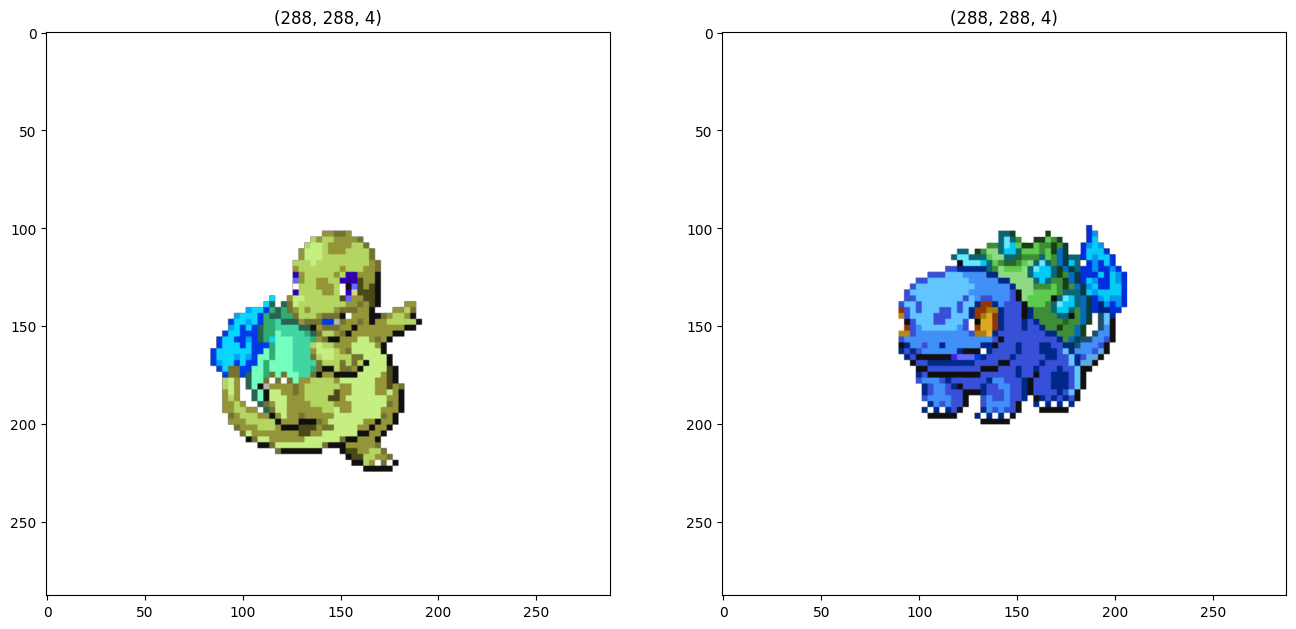

In [10]:
import cv2

plt.subplots(1,2,figsize=(16,8))

filepath = METADATA_DF.loc[("1","4"),"path"].values[0] #bulbasaur and squrtle according to dex
print(f"loading {filepath} as sample")
test_img = cv2.imread(filepath,cv2.IMREAD_UNCHANGED)
plt.subplot(1,2,1)
plt.imshow(test_img)
plt.title(test_img.shape)

filepath = METADATA_DF.loc[("4","1"),"path"].values[0] #squrtle and bulbasaur according to dex
print(f"loading {filepath} as sample")
test_img = cv2.imread(filepath,cv2.IMREAD_UNCHANGED)
plt.subplot(1,2,2)
plt.imshow(test_img)
plt.title(test_img.shape)

plt.show()


In [11]:
def clean_alpha(img_array):
  mask = (img_array[:,:,3]==0)
  img_array = img_array.astype(float)/255
  img_array[:,:,:3][mask]=0
  return img_array

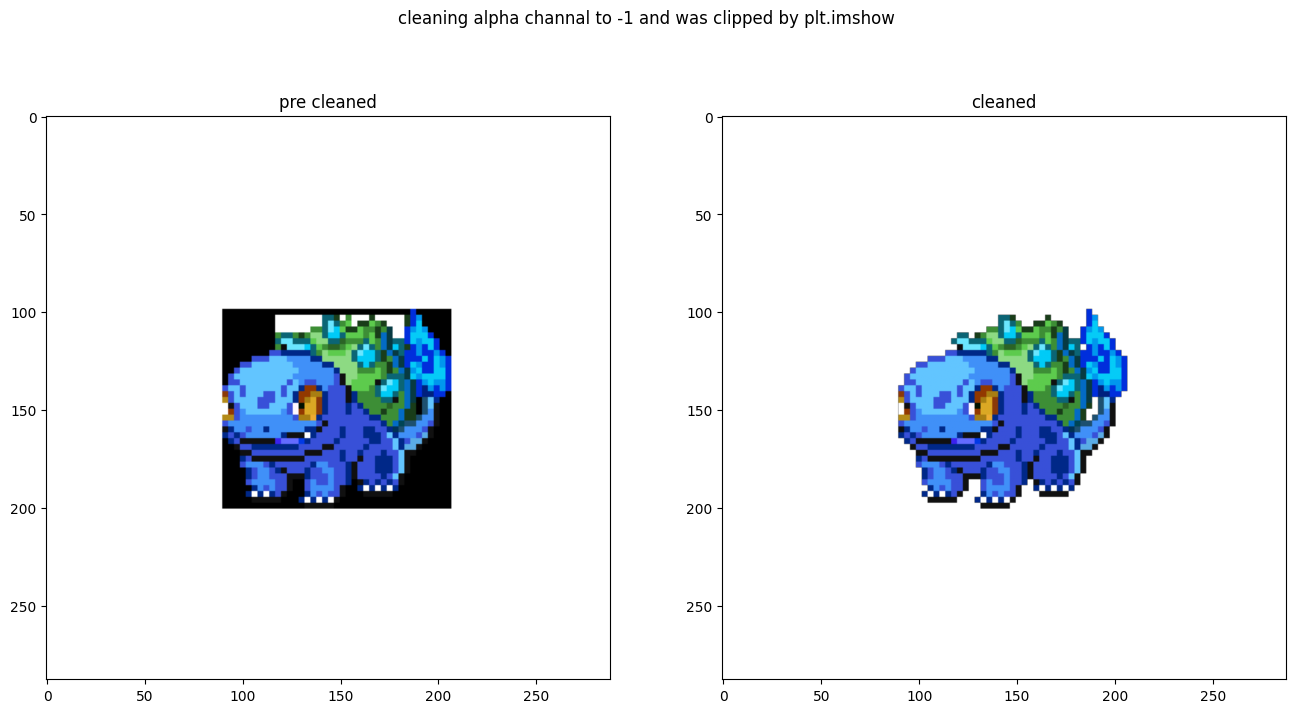

In [12]:
plt.subplots(1,2,figsize=(16,8))
plt.suptitle("cleaning alpha channal to -1 and was clipped by plt.imshow")
plt.subplot(1,2,1)
plt.imshow((test_img[:,:,:3]))
plt.title("pre cleaned")

plt.subplot(1,2,2)
plt.imshow(clean_alpha(test_img))
plt.title("cleaned")

plt.show()

# part 2: BUILD VAE and see what happens

references:
>https://keras.io/examples/generative/vae/

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon


In [31]:
latent_dim = 10

encoder_inputs = keras.Input(shape=(288, 288, 4))

x = layers.Conv2D(32, 3, activation="LeakyReLU", strides=2, padding="same")(encoder_inputs)
x = layers.Dropout(.2)(x)
x = layers.Conv2D(32, 3, activation="LeakyReLU", strides=1, padding="same")(x)
x = layers.Dropout(.2)(x)
# x = layers.Conv2D(32, 3, activation="LeakyReLU", strides=1, padding="same")(x)
# x = layers.Dropout(.2)(x)

x = layers.Conv2D(64, 3, activation="LeakyReLU", strides=2, padding="same")(x)
x = layers.Dropout(.2)(x)
x = layers.Conv2D(64, 3, activation="LeakyReLU", strides=1, padding="same")(x)
x = layers.Dropout(.2)(x)
# x = layers.Conv2D(64, 3, activation="LeakyReLU", strides=1, padding="same")(x)
# x = layers.Dropout(.2)(x)

x = layers.Conv2D(128, 3, activation="LeakyReLU", strides=2, padding="same")(x)
x = layers.Dropout(.2)(x)
x = layers.Conv2D(128, 3, activation="LeakyReLU", strides=1, padding="same")(x)
x = layers.Dropout(.2)(x)
# x = layers.Conv2D(128, 3, activation="LeakyReLU", strides=1, padding="same")(x)
# x = layers.Dropout(.2)(x)

x = layers.Conv2D(256, 3, activation="LeakyReLU", strides=2, padding="same")(x)
x = layers.Dropout(.2)(x)
x = layers.Conv2D(256, 3, activation="LeakyReLU", strides=1, padding="same")(x)
x = layers.Dropout(.2)(x)
# x = layers.Conv2D(256, 3, activation="LeakyReLU", strides=1, padding="same")(x)
# x = layers.Dropout(.2)(x)

x = layers.Flatten()(x)
x = layers.Dense(16, activation="LeakyReLU")(x)  # Add the activation function back
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()


Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 288, 288, 4  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_48 (Conv2D)             (None, 144, 144, 32  1184        ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 dropout_24 (Dropout)           (None, 144, 144, 32  0           ['conv2d_48[0][0]']              
                                )                                                           

In [32]:
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(9 * 9 * 8, activation="LeakyReLU")(latent_inputs)
x = layers.Reshape((9, 9, 8))(x)
x = layers.Conv2DTranspose(256, 3, activation="LeakyReLU", strides=2, padding="same")(x)
x = layers.Conv2D(256, 3, activation="LeakyReLU", strides=1, padding="same")(x)
# x = layers.Conv2D(256, 3, activation="LeakyReLU", strides=1, padding="same")(x)

x = layers.Conv2DTranspose(128, 3, activation="LeakyReLU", strides=2, padding="same")(x)
x = layers.Conv2D(128, 3, activation="LeakyReLU", strides=1, padding="same")(x)
# x = layers.Conv2D(128, 3, activation="LeakyReLU", strides=1, padding="same")(x)

x = layers.Conv2DTranspose(64, 3, activation="LeakyReLU", strides=2, padding="same")(x)
x = layers.Conv2D(64, 3, activation="LeakyReLU", strides=1, padding="same")(x)
# x = layers.Conv2D(64, 3, activation="LeakyReLU", strides=1, padding="same")(x)

x = layers.Conv2DTranspose(32, 3, activation="LeakyReLU", strides=2, padding="same")(x)
x = layers.Conv2D(32, 3, activation="LeakyReLU", strides=1, padding="same")(x)
# x = layers.Conv2D(32, 3, activation="LeakyReLU", strides=1, padding="same")(x)

x = layers.Conv2DTranspose(16, 3, activation="LeakyReLU", strides=2, padding="same")(x)
x = layers.Conv2D(16, 3, activation="LeakyReLU", strides=1, padding="same")(x)
# x = layers.Conv2D(16, 3, activation="LeakyReLU", strides=1, padding="same")(x)


x = layers.Conv2DTranspose(4, 3, activation="LeakyReLU", padding="same")(x)
x = layers.Conv2D(4, 3, activation="LeakyReLU", strides=1, padding="same")(x)
decoder_outputs = layers.Conv2D(4, 3, activation="sigmoid", strides=1, padding="same")(x)

decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_5 (Dense)             (None, 648)               7128      
                                                                 
 reshape_2 (Reshape)         (None, 9, 9, 8)           0         
                                                                 
 conv2d_transpose_12 (Conv2D  (None, 18, 18, 256)      18688     
 Transpose)                                                      
                                                                 
 conv2d_56 (Conv2D)          (None, 18, 18, 256)       590080    
                                                                 
 conv2d_transpose_13 (Conv2D  (None, 36, 36, 128)      295040    
 Transpose)                                                

In [33]:
import math as m

class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")
        self.total_steps=0
        self.initial_kl_weight=0
        self.final_kl_weight =1
    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        self.total_steps = self.total_steps+1
        kl_weight = self.kl_annealing(self.optimizer.iterations)

        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            # reconstruction_loss  = tf.reduce_mean(
            #     keras.losses.mean_squared_error(data, reconstruction)
            # )
            reconstruction_loss = self.custom_loss(data, reconstruction)
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss*kl_weight
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }
    def custom_loss(self,y_true, y_pred):
      true_alpha = y_true[..., 3]
      true_rgb = y_true[..., :3]
      pred_alpha = y_pred[..., 3]
      pred_rgb = y_pred[..., :3]

      # Compute the visible region mask
      visible_mask = K.cast(true_alpha > 0.5, K.floatx())
      # Expand dimensions of visible_mask to match true_rgb and pred_rgb
      visible_mask = K.expand_dims(visible_mask, axis=-1)
      # Compute the masked RGB loss
      rgb_loss = K.sum(K.square(true_rgb - pred_rgb) * visible_mask,axis=[1,2])/K.sum(visible_mask) #only the visible region

      # Compute the binary cross-entropy (BCE) loss for the alpha channel
      alpha_loss = K.binary_crossentropy(true_alpha, pred_alpha)
      alpha_loss = K.mean(alpha_loss)

      # Combine the RGB and alpha losses using weights if necessary
      total_loss = (rgb_loss*2 + alpha_loss)/3

      return total_loss
    def kl_annealing(self, step):
        # https://medium.com/mlearning-ai/a-must-have-training-trick-for-vae-variational-autoencoder-d28ff53b0023
        # total_steps = self.total_steps 
        # phase = total_steps // 2  # Number of steps in each cycle
        # Compute the sigmoid function
        
        
        p = tf.cast((step % 100)/200, tf.float32) *tf.constant(m.pi)
       
        kl_weight = (tf.sin(p))
        # kl_weight = self.initial_kl_weight + (self.final_kl_weight - self.initial_kl_weight) * tf.sigmoid(1.0 * (p - 0.5))
        return kl_weight

## defining data loader 

In [34]:
import keras
from keras.utils import Sequence
import numpy as np

class CustomDataLoader(Sequence):
    def __init__(self, image_paths, preprocessing_function, batch_size,load_shape=(288,288,4)):
        self.image_paths = image_paths
        self.preprocessing_function = preprocessing_function
        self.batch_size = batch_size
        self.load_shape = load_shape
        
    def __len__(self):
        return int(np.ceil(len(self.image_paths) / self.batch_size))

    def __getitem__(self, idx):
        batch_paths = self.image_paths[idx * self.batch_size: (idx + 1) * self.batch_size]
        batch_images = []
        
        for path in batch_paths:
            img = load_img(path, color_mode='rgba',target_size=self.load_shape)
            img = img_to_array(img)
            img = self.preprocessing_function(img)
            batch_images.append(img)
        
        batch_images = np.array(batch_images)
        return batch_images


In [35]:
image_paths = METADATA_DF.loc[:,"path"].values  # List of image paths
preprocessing_function = clean_alpha  #  preprocessing function
batch_size = 32

data_loader = CustomDataLoader(image_paths, preprocessing_function, batch_size)
# # history = tpu_model.fit(data_loader, epochs=10)
# history = tpu_model.fit(data_loader, epochs=10)
with tf.device("/gpu:0"):
    vae = VAE(encoder, decoder)
    vae.compile(optimizer="adam")
    history = vae.fit(data_loader, epochs=10,shuffle=True)


Epoch 1/10


2023-05-30 10:29:52.489692: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 649/1654 [==========>...................] - ETA: 35:05 - loss: 0.1486 - reconstruction_loss: 0.1226 - kl_loss: 0.0019

In [ ]:
img =  clean_alpha(img_to_array(load_img(METADATA_DF.loc[:,"path"].values[0], color_mode='rgba',target_size=(288,288,4))))
img = np.array([img])

In [ ]:
_,_,z = vae.encoder.predict([img])
out_img = vae.decoder.predict(z)

2023-05-30 10:27:53.768026: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 5s 5s/step


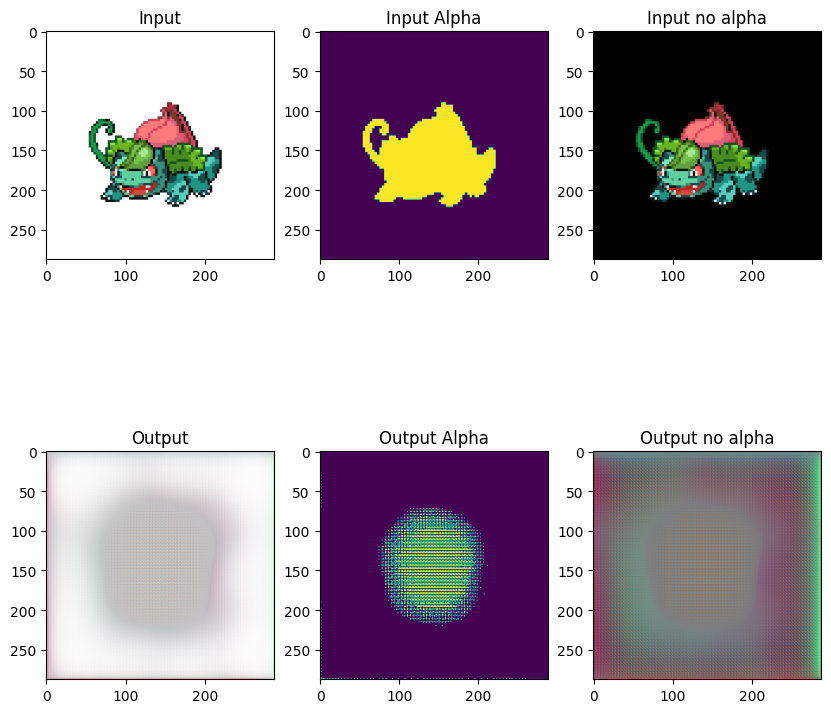

In [ ]:
fig, axes = plt.subplots(2,3,figsize=(10,10))


axes[0,0].set_title("Input")
axes[0,0].imshow(img[0])
axes[0,1].set_title("Input Alpha")
axes[0,1].imshow(img[0][...,3])
axes[0,2].set_title("Input no alpha")
axes[0,2].imshow(img[0][..., :3])

axes[1,0].set_title("Output")
axes[1,0].imshow(out_img[0])
axes[1,1].set_title("Output Alpha")
axes[1,1].imshow(out_img[0][...,3]>0.5)
axes[1,2].set_title("Output no alpha")
axes[1,2].imshow(out_img[0][..., :3])





1/1 [==============================] - 0s 27ms/step


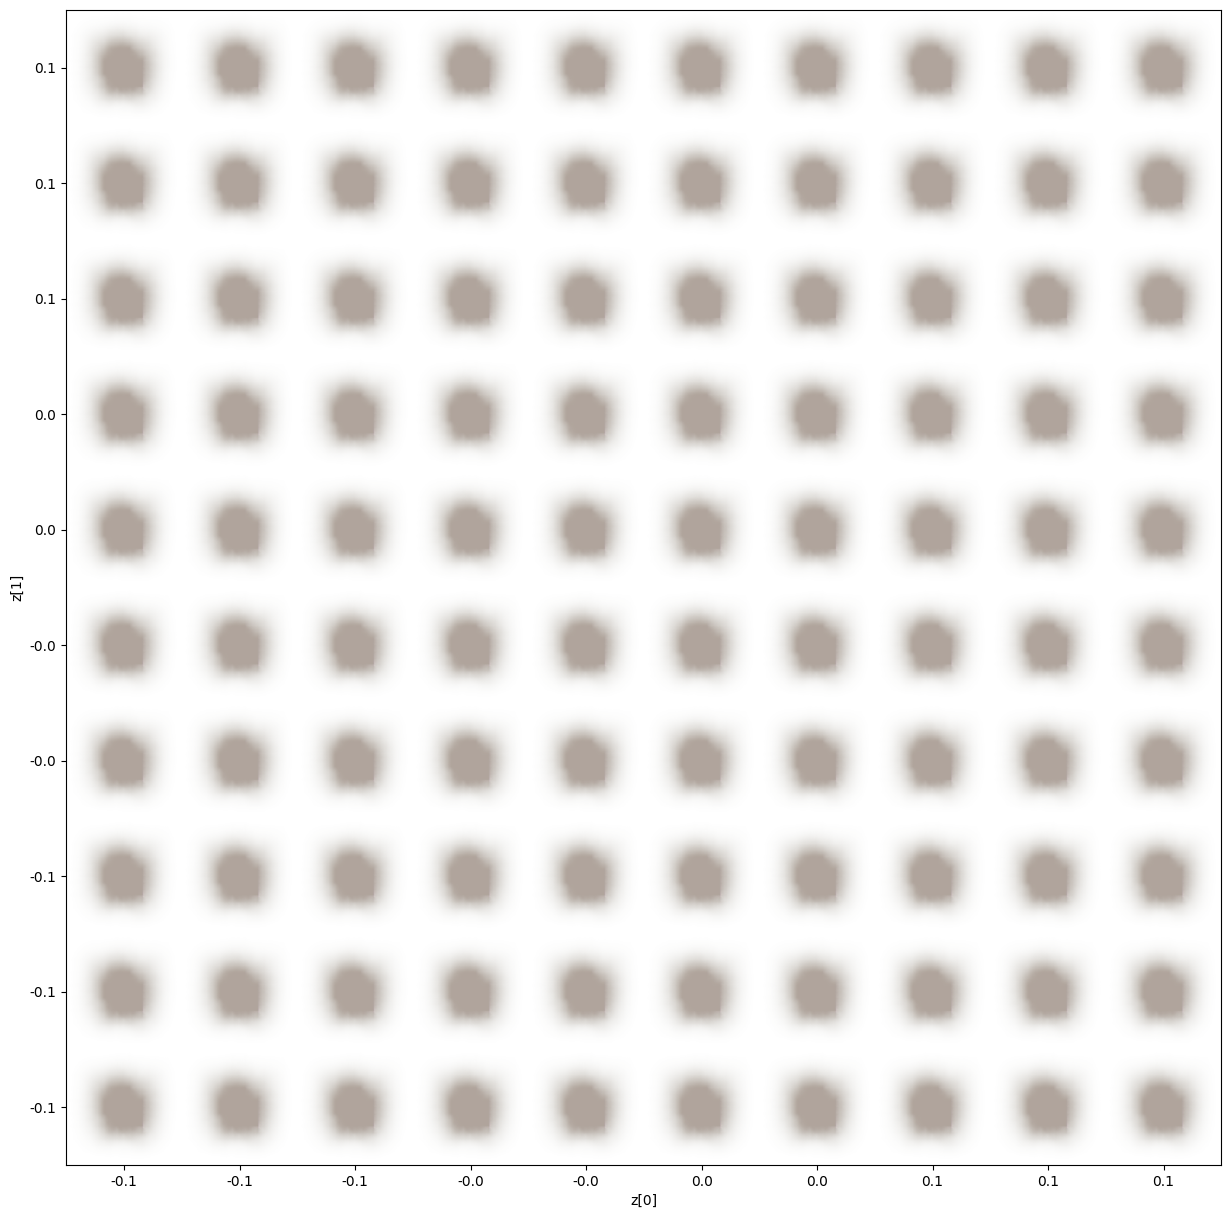

In [234]:
def plot_latent_space(vae, n=10, figsize=15):
    # display a n*n 2D manifold of digits
    digit_size = 288
    scale = 0.1
    figure = np.zeros((digit_size * n, digit_size * n,4))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(0, 1, n)
    grid_y = np.linspace(0, 1, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi,0]])
            x_decoded = vae.decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size,4)
            figure[
                i * digit_size : (i + 1) * digit_size,
                j * digit_size : (j + 1) * digit_size,
            ] = digit

    plt.figure(figsize=(figsize, figsize))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap="Greys_r")
    plt.show()


plot_latent_space(vae)

In [ ]:
vae.decoder